In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta


from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing


import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/Micro/Downloads/Walmart.csv.xls")

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [17]:
# Check for missing data
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

###### The dataset has no null values, which is great for analysis.

In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Exploratory Data Analysis (EDA)

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

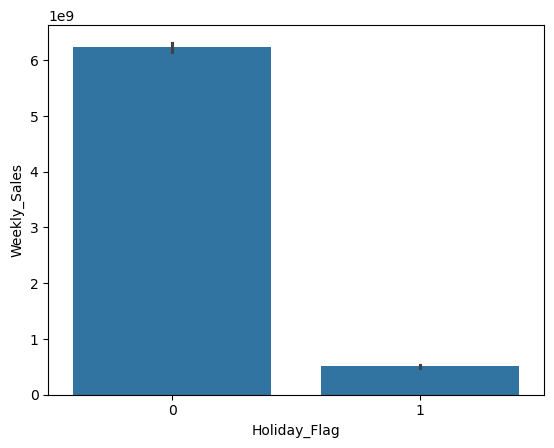

In [22]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, estimator=np.sum)

In [24]:
df_holiday = df.loc[df['Holiday_Flag']==1]
df_holiday['Date'].unique()

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [26]:
df_not_holiday = df.loc[df['Holiday_Flag']==0]
df_not_holiday['Date'].unique() 

array(['05-02-2010', '19-02-2010', '26-02-2010', '05-03-2010',
       '12-03-2010', '19-03-2010', '26-03-2010', '02-04-2010',
       '09-04-2010', '16-04-2010', '23-04-2010', '30-04-2010',
       '07-05-2010', '14-05-2010', '21-05-2010', '28-05-2010',
       '04-06-2010', '11-06-2010', '18-06-2010', '25-06-2010',
       '02-07-2010', '09-07-2010', '16-07-2010', '23-07-2010',
       '30-07-2010', '06-08-2010', '13-08-2010', '20-08-2010',
       '27-08-2010', '03-09-2010', '17-09-2010', '24-09-2010',
       '01-10-2010', '08-10-2010', '15-10-2010', '22-10-2010',
       '29-10-2010', '05-11-2010', '12-11-2010', '19-11-2010',
       '03-12-2010', '10-12-2010', '17-12-2010', '24-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '18-02-2011', '25-02-2011', '04-03-2011',
       '11-03-2011', '18-03-2011', '25-03-2011', '01-04-2011',
       '08-04-2011', '15-04-2011', '22-04-2011', '29-04-2011',
       '06-05-2011', '13-05-2011', '20-05-2011', '27-05

##### All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11

Christmas: 31-Dec-10, 30-Dec-11

When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In the data, there are 133 weeks for non-holiday and 10 weeks for holiday.

## I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [28]:
# Super bowl dates
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012'),'Super_Bowl'] = True
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012'),'Super_Bowl'] = False

In [30]:
# Labor day dates
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012'),'Labor_Day'] = True
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-2011')&(df['Date'] != '07-09-2012'),'Labor_Day'] = False

In [32]:
# Thanksgiving dates 
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011'),'Thanksgiving'] = True
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '22-11-2011'),'Thanksgiving'] = False

In [34]:
#Christmas dates 
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011'),'Christmas'] = True
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

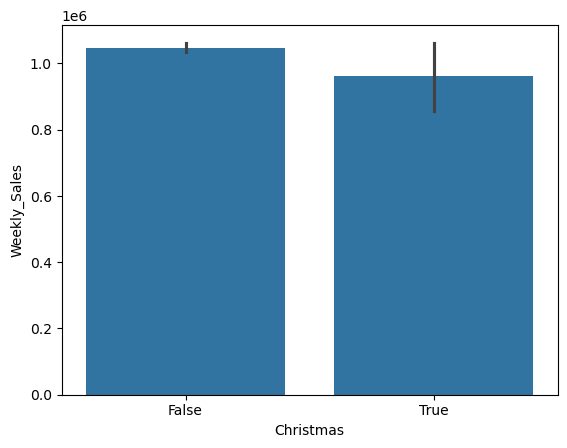

In [36]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

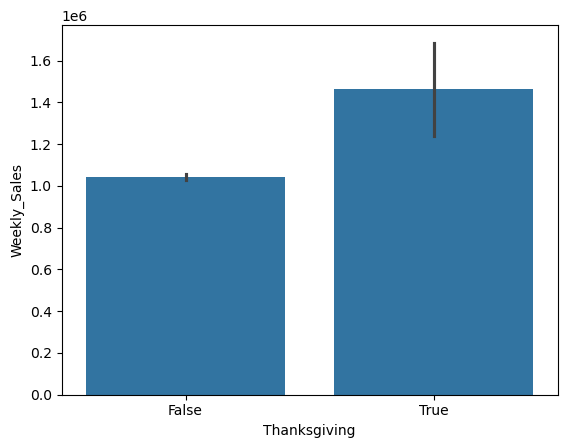

In [38]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

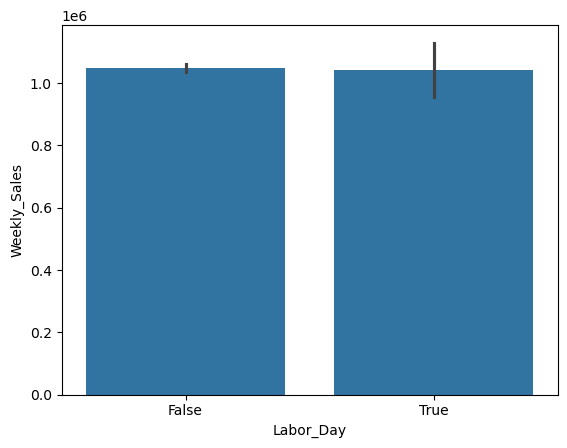

In [40]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

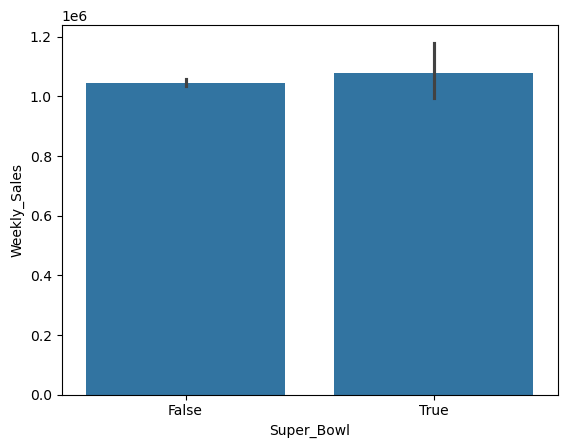

In [42]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

###### It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

In [44]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

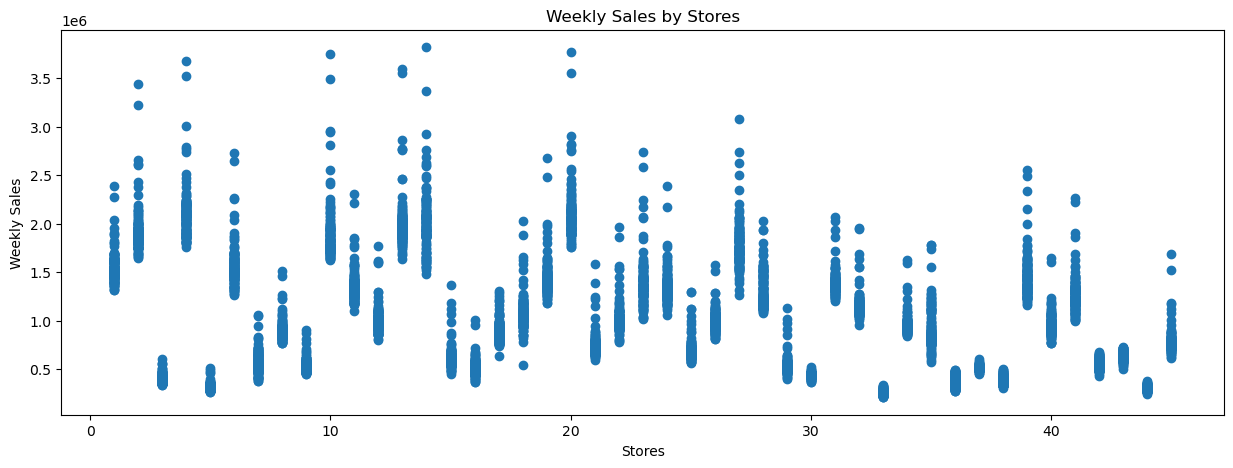

In [46]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

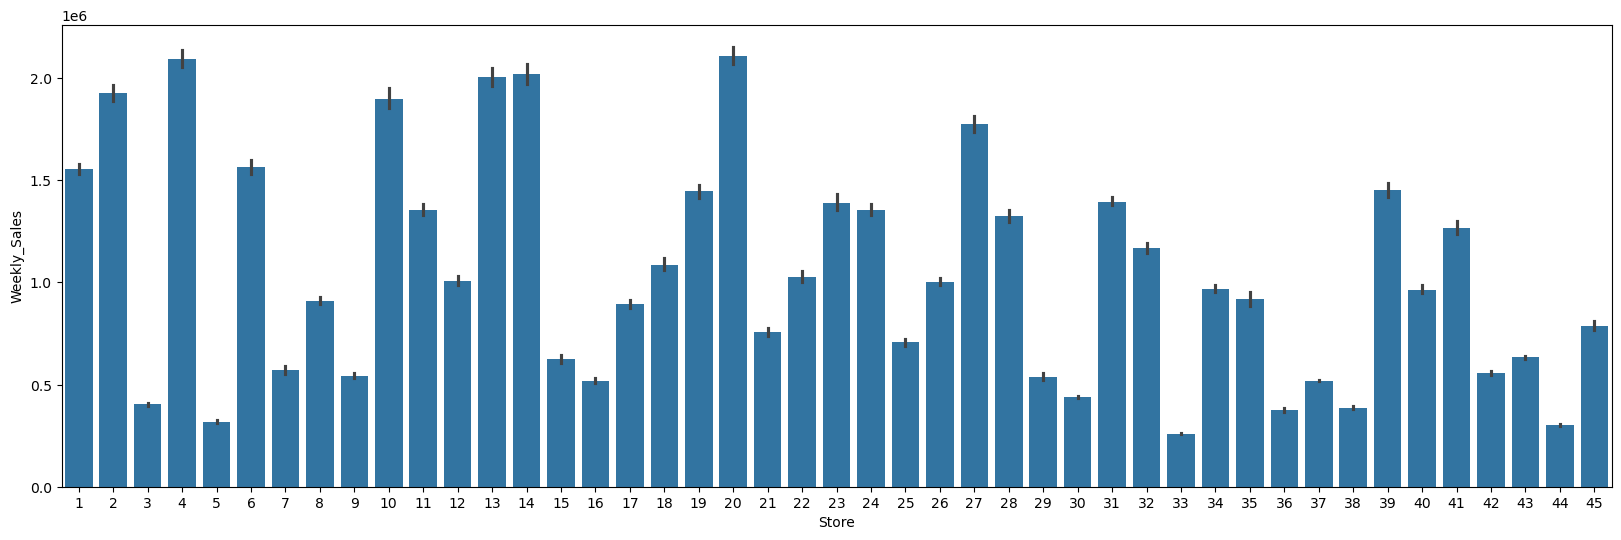

In [48]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df, estimator=np.mean)

### Encode Categorical Variables and Create Additional Features

In [51]:
# Feature engineering
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['Week'] = df['Date'].dt.isocalendar().week

df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df['Fuel_CPI_Ratio'] = df['Fuel_Price'] / df['CPI']

In [53]:
df.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

Year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Month'>

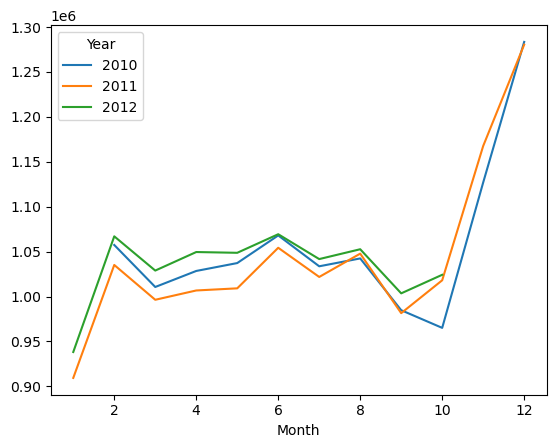

In [55]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

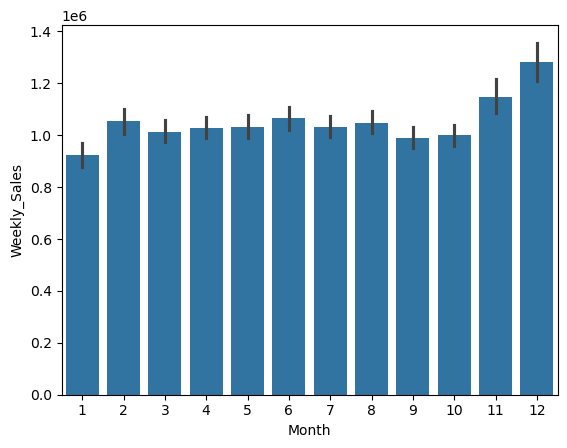

In [57]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)

In [59]:
df.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False)

Week
51    1.754774e+06
47    1.471273e+06
50    1.354517e+06
49    1.235866e+06
48    1.103329e+06
22    1.090683e+06
7     1.090298e+06
27    1.088976e+06
14    1.087075e+06
6     1.079128e+06
23    1.075166e+06
31    1.064492e+06
24    1.062828e+06
26    1.059949e+06
18    1.055477e+06
5     1.051774e+06
45    1.051100e+06
44    1.049306e+06
33    1.046909e+06
21    1.044025e+06
34    1.042770e+06
36    1.042427e+06
9     1.042319e+06
25    1.038233e+06
32    1.037907e+06
40    1.036158e+06
35    1.035041e+06
13    1.030783e+06
16    1.025805e+06
10    1.022468e+06
28    1.021182e+06
19    1.020016e+06
46    1.017384e+06
15    1.013232e+06
11    1.013058e+06
29    1.009058e+06
20    1.007338e+06
43    1.000021e+06
42    9.926521e+05
8     9.915995e+05
41    9.900208e+05
30    9.808207e+05
12    9.778071e+05
1     9.747912e+05
37    9.711165e+05
17    9.700145e+05
52    9.608331e+05
38    9.513419e+05
39    9.494119e+05
3     9.192849e+05
2     9.188529e+05
4     8.826092e+05
Name: W

<Axes: xlabel='Week'>

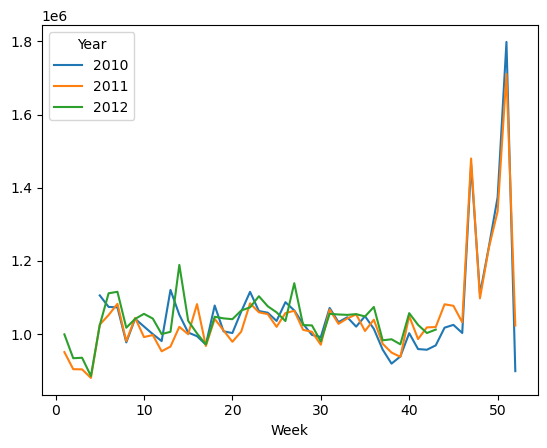

In [61]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

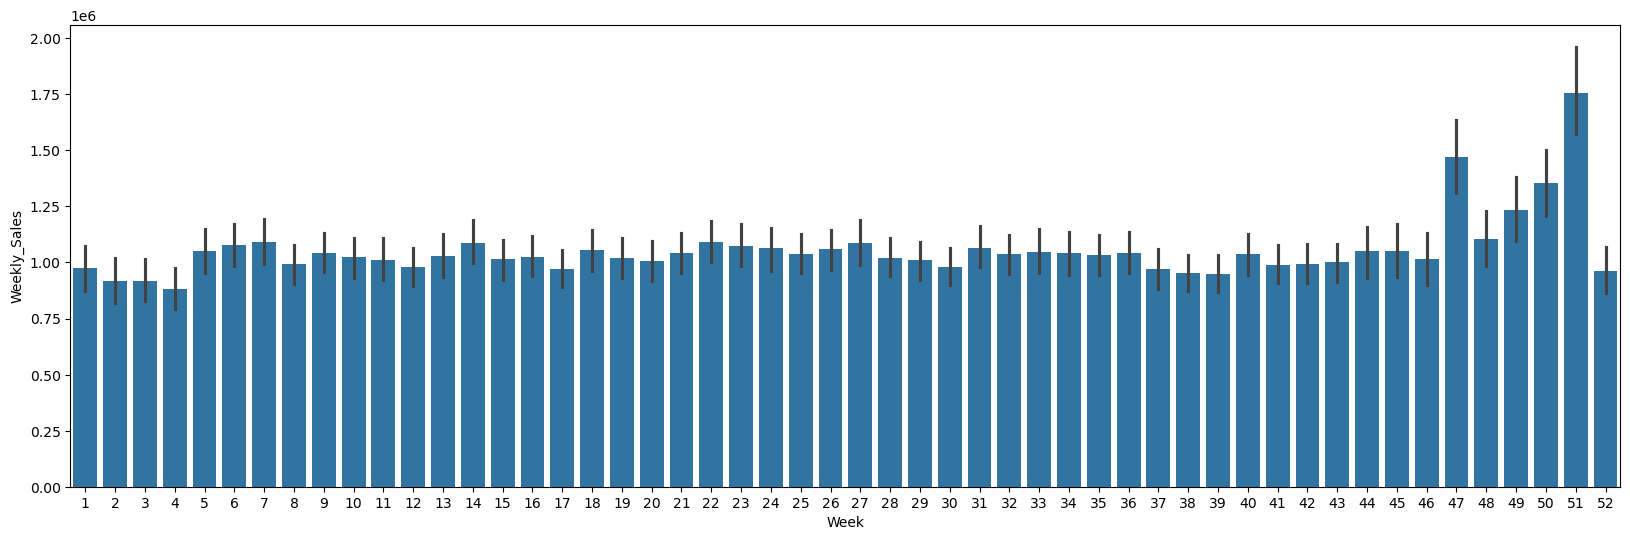

In [63]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=df)

### Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

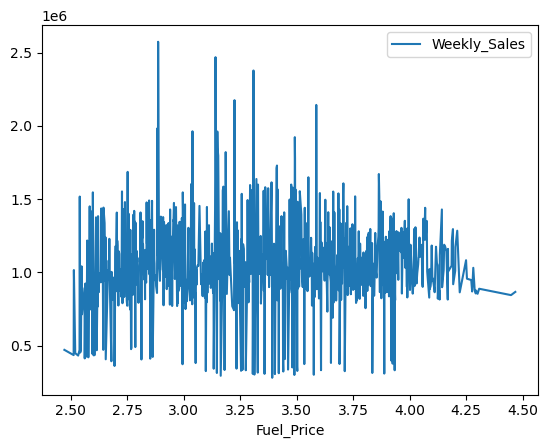

In [66]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

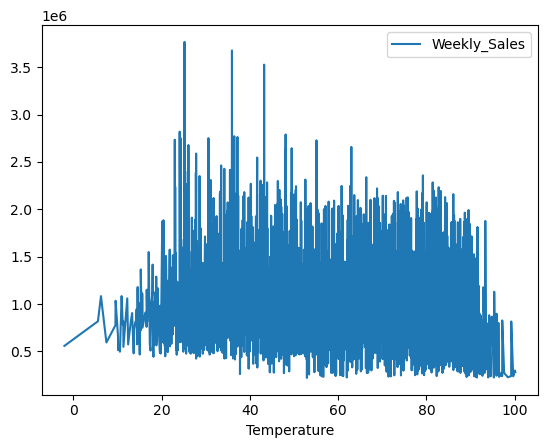

In [68]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

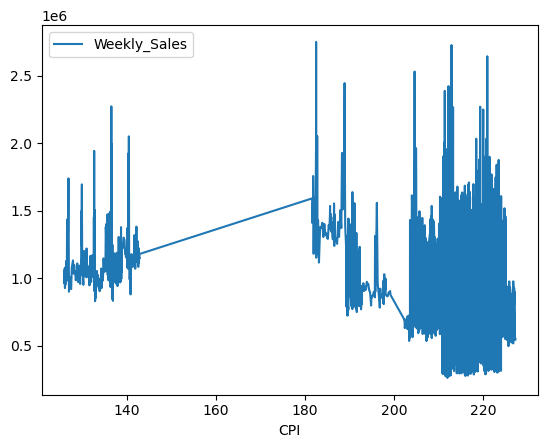

In [70]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

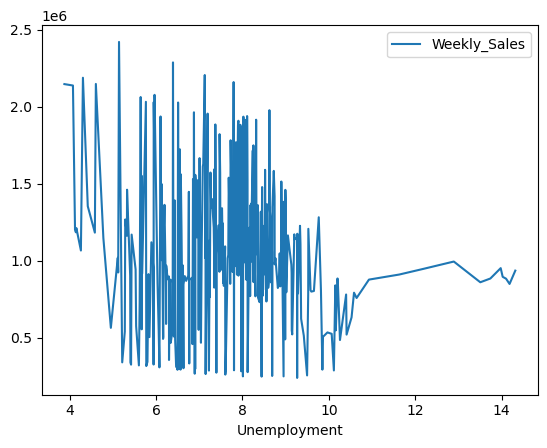

In [72]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

<Axes: xlabel='Fuel_CPI_Ratio'>

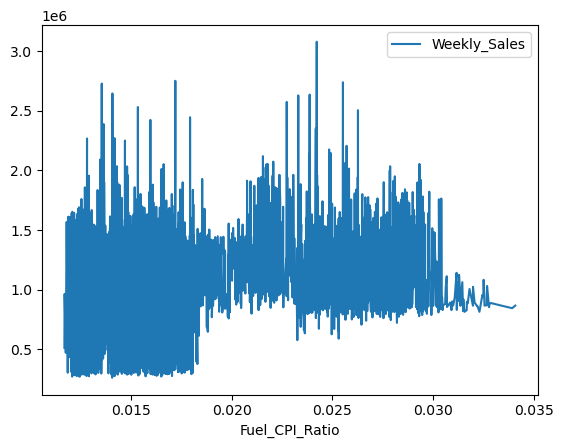

In [74]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_CPI_Ratio")
unemployment.plot()

#  Analyze the distribution of the target variable

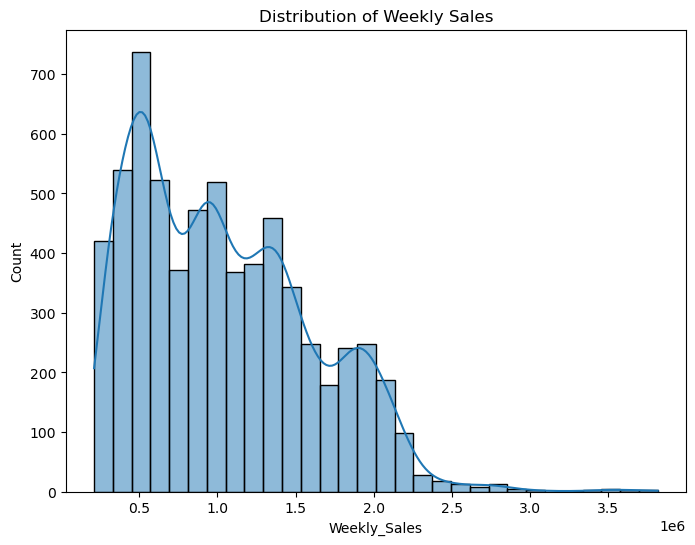

In [117]:
plt.figure(figsize=(8,6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()


# Visualize numeric features using box plot

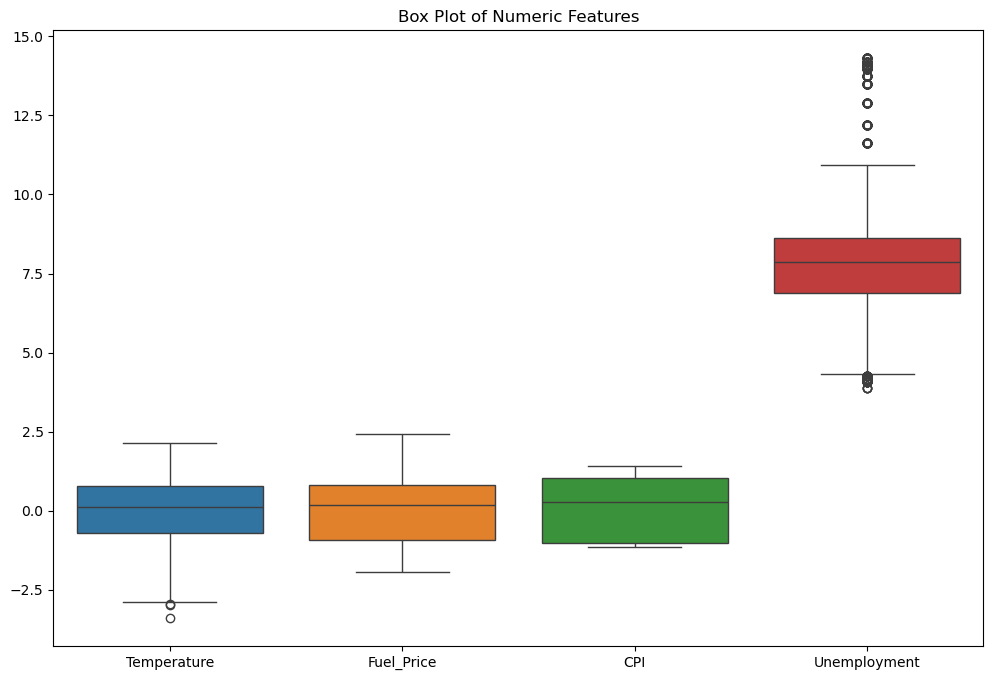

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.title('Box Plot of Numeric Features')
plt.show()


# Pairplot for feature relationships

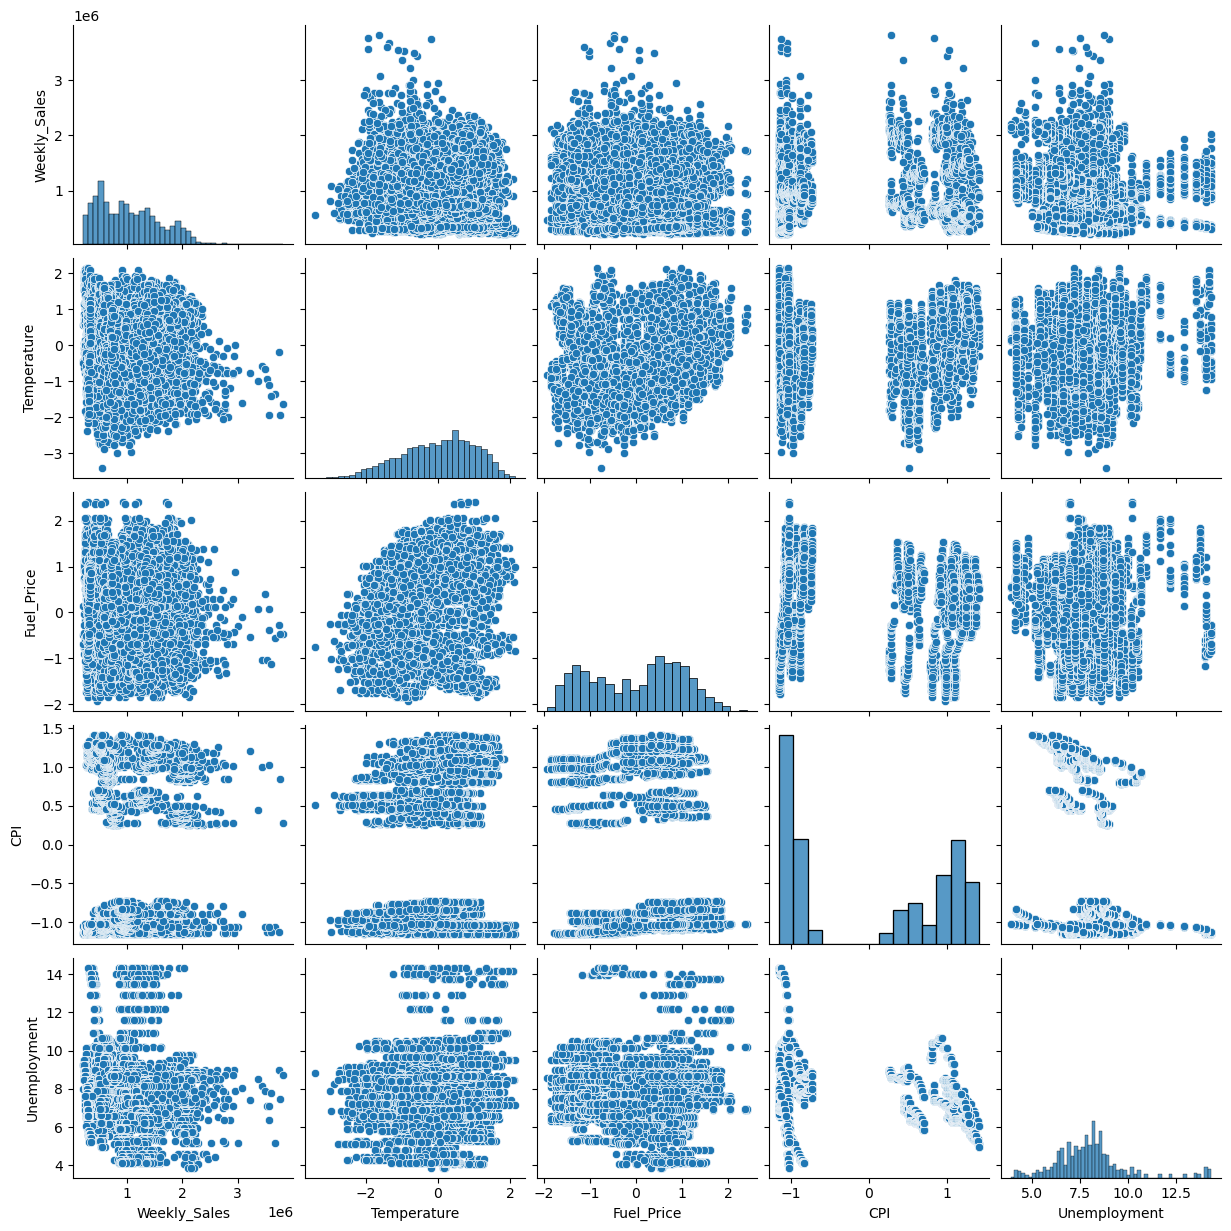

In [102]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


# Check multicollinearity

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)


                             Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                 1.000000e+00      0.006949 -1.328524e-02     0.145357   
Weekly_Sales         6.949360e-03      1.000000  3.689097e-02    -0.063810   
Holiday_Flag        -1.328524e-02      0.036891  1.000000e+00    -0.155091   
Temperature          1.453566e-01     -0.063810 -1.550913e-01     1.000000   
Fuel_Price           7.714439e-01      0.009464 -7.834652e-02     0.144982   
...                           ...           ...           ...          ...   
Store_43             4.153798e-14     -0.110502 -9.850587e-17     0.067140   
Store_44             3.933284e-14     -0.198813 -8.094415e-17    -0.056945   
Store_45             3.247803e-14     -0.069720 -9.832838e-17    -0.023482   
Holiday_Temperature  1.582354e-02      0.029733  9.239961e-01    -0.033379   
Economic_Condition   4.933105e-01     -0.055806 -4.564155e-02     0.237842   

                     Fuel_Price       CPI  Unemployment    Supe

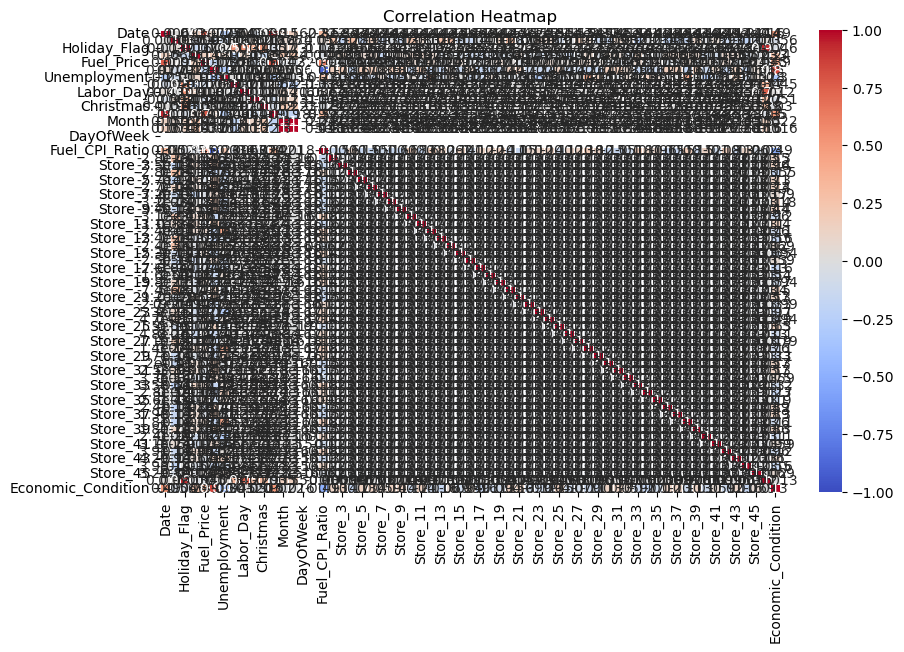

In [133]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


## Findings and Explorations

 ##### 1. As expected, holiday average sales are higher than normal dates.

2. Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.

3. Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.

3. It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. 

4. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and another important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.

5. January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

6. CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales. 

In [86]:
#Create Holiday_Temperature:
df['Holiday_Temperature'] = df['Holiday_Flag'] * df['Temperature']


In [88]:
# . Combine Fuel_Price and CPI into a new feature:
df['Economic_Condition'] = df['Fuel_Price'] * df['CPI']


In [90]:
#Normalization or Scaling
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['Temperature', 'Fuel_Price', 'CPI']

# Initialize scaler
scaler = StandardScaler()

# Scale the features and update the dataframe
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Scale the new features as well
df[['Holiday_Temperature', 'Economic_Condition']] = scaler.fit_transform(df[['Holiday_Temperature', 'Economic_Condition']])


In [96]:
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,...,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Temperature,Economic_Condition
0,2010-02-05,1643690.90,0,-0.995136,-1.713800,1.004175,8.106,False,False,False,...,False,False,False,False,False,False,False,False,-0.253364,-0.212553
1,2010-02-12,1641957.44,1,-1.201170,-1.766089,1.007880,8.106,True,False,False,...,False,False,False,False,False,False,False,False,2.524258,-0.245549
2,2010-02-19,1611968.17,0,-1.124178,-1.840166,1.009074,8.106,False,False,False,...,False,False,False,False,False,False,False,False,-0.253364,-0.295198
3,2010-02-26,1409727.59,0,-0.760907,-1.737766,1.009849,8.106,False,False,False,...,False,False,False,False,False,False,False,False,-0.253364,-0.224854
4,2010-03-05,1554806.68,0,-0.767955,-1.598328,1.010624,8.106,False,False,False,...,False,False,False,False,False,False,False,False,-0.253364,-0.129237


In [94]:
#Update the Feature Set for Modeling
X = df.drop(columns=['Weekly_Sales', 'Date', 'Super_Bowl', 'Fuel_Price', 'CPI', 'Labor_Day', 'Thanksgiving', 'Christmas'])


###  Encode Categorical Variables and Normalizing the numerical columns

In [77]:
# One-hot encode Store
df = pd.get_dummies(df, columns=['Store'], prefix='Store', drop_first=True)

### Applying ML Model for Sales Prediction

In [80]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

# Preparing features and target variable
X = df.drop(columns=['Weekly_Sales', 'Date', 'Super_Bowl', 'Fuel_Price', 'CPI', 'Labor_Day', 'Thanksgiving', 'Christmas'])  # Exclude target and original date
y = df['Weekly_Sales']

# Initialize models
linear_regression_model = LinearRegression()

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


# Initializing the KFold and scoring methods

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scorer = 'r2'

mae_scorer = make_scorer(mean_absolute_error)

rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Linear Regression
r2_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=r2_scorer).mean()
mae_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_linear = cross_val_score(linear_regression_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Random Forest
r2_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=r2_scorer).mean()
mae_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_rf = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Display the results
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_linear, r2_rf],
    'MAE': [mae_linear, mae_rf],
    'RMSE': [rmse_linear, rmse_rf]
}

results_df = pd.DataFrame(results)

In [81]:
print (results_df)

               Model  R2 Score           MAE           RMSE
0  Linear Regression  0.925887  94856.414272  153548.409915
1      Random Forest  0.957946  60260.567853  115536.388379


In [84]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Decision Tree Regressor
r2_dt = cross_val_score(decision_tree_model, X, y, cv=kfold, scoring=r2_scorer).mean()
mae_dt = cross_val_score(decision_tree_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_dt = cross_val_score(decision_tree_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Add Decision Tree results to the existing results dictionary
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'R2 Score': [r2_linear, r2_rf, r2_dt],
    'MAE': [mae_linear, mae_rf, mae_dt],
    'RMSE': [rmse_linear, rmse_rf, rmse_dt]
}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score           MAE           RMSE
0  Linear Regression  0.925887  94856.414272  153548.409915
1      Random Forest  0.957946  60260.567853  115536.388379
2      Decision Tree  0.941844  72111.396454  135338.307964


In [122]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation to evaluate the model
r2_gb = cross_val_score(gradient_boosting_model, X, y, cv=kfold, scoring='r2').mean()
mae_gb = cross_val_score(gradient_boosting_model, X, y, cv=kfold, scoring=mae_scorer).mean()
rmse_gb = cross_val_score(gradient_boosting_model, X, y, cv=kfold, scoring=rmse_scorer).mean()

# Add Gradient Boosting results to the results dictionary
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'R2 Score': [r2_linear, r2_rf, r2_dt, r2_gb],
    'MAE': [mae_linear, mae_rf, mae_dt, mae_gb],
    'RMSE': [rmse_linear, rmse_rf, rmse_dt, rmse_gb]
}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score            MAE           RMSE
0  Linear Regression  0.925887   94856.414272  153548.409915
1      Random Forest  0.957946   60260.567853  115536.388379
2      Decision Tree  0.941844   72111.396454  135338.307964
3  Gradient Boosting  0.834400  188111.101739  229574.806441


### Outcomes & Conclusion

##### In this project, we explored and implemented several regression models to predict Walmart's Weekly Sales based on various features such as Temperature, Fuel Price, CPI, Unemployment Rate, and Holiday Flags. After performing Exploratory Data Analysis (EDA), data preprocessing, and feature engineering, we trained and evaluated four machine learning models: Linear Regression, Random Forest, Decision Tree, and Gradient Boosting.

Here are the results for each model:

Model	R2 Score	MAE	RMSE
Linear Regression	0.925887	94856.41	153548.41
Random Forest	0.957946	60260.57	115536.39
Decision Tree	0.941844	72111.40	135338.31
Gradient Boosting	0.834400	188111.10	229574.81
Analysis of Results:
Linear Regression:

R² Score: 0.93
MAE: 94,856
RMSE: 153,548
The Linear Regression model performed well with an R² score of 0.93, indicating that 93% of the variance in the data was explained by the model. However, its MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) values suggest that the model still has a relatively high error in predicting sales. While it serves as a good baseline, this model could be improved.
Random Forest:

R² Score: 0.96
MAE: 60,261
RMSE: 115,536
The Random Forest model significantly outperformed Linear Regression, achieving the highest R² score of 0.96, meaning it captured 96% of the variance. It also had the lowest MAE (60,261) and RMSE (115,536), indicating that it made more accurate predictions with fewer errors. This suggests that Random Forest is more capable of handling the complexities of the dataset, including non-linear relationships between features and sales.
Decision Tree:

R² Score: 0.94
MAE: 72,111
RMSE: 135,338
The Decision Tree performed quite well, with an R² score of 0.94, but it still had slightly higher error rates (MAE and RMSE) compared to Random Forest. This makes sense as Random Forest is an ensemble method of multiple decision trees, which helps reduce overfitting and increase predictive power.
Gradient Boosting:

R² Score: 0.83
MAE: 188,111
RMSE: 229,575
Surprisingly, Gradient Boosting performed worse than the other models, with a much lower R² score (0.83) and significantly higher MAE and RMSE. This may be due to the need for further hyperparameter tuning or because Gradient Boosting was not as well-suited to the dataset as Random Forest and Decision Tree.
Conclusion:
Based on the analysis of these models, Random Forest stands out as the best model for predicting Walmart’s weekly sales. It achieved the highest R² score (0.96) and the lowest MAE and RMSE, indicating that it provides the most accurate and reliable predictions. The model captures complex relationships between features and is robust to overfitting due to its ensemble nature.

For future predictions, Random Forest would be the model of choice due to its strong performance and ability to generalize well. However, further tuning of hyperparameters and additional feature engineering may help improve the results even further, particularly for models like Gradient Boosting.